<a href="https://colab.research.google.com/github/kitlapp/Telco_ML/blob/main/cleaning_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. IBM's Telco Customers: Application of Machine Leaning Techniques

We gratefully acknowledge IBM for collecting and sharing the dataset. The data can be accessed via [Kaggle](https://www.kaggle.com/) at the following link:
[Telco Customer Churn Dataset](https://www.kaggle.com/datasets/blastchar/telco-customer-churn?utm_source=chatgpt.com)

The dataset is well suited for the scope of the Applied Machine Learning project, as it presents an intermediate level of preprocessing complexity and includes both classification and regression targets. Specifically, it contains a binary churn label for classification tasks and continuous financial variables (e.g., charges) suitable for regression analysis. This allows the project to focus primarily on applied machine learning concepts rather than extensive data validation, interpretation, or complex preprocessing.

Although the Kaggle page primarily provides access to the raw dataset in CSV format, additional contextual information about the business problem is available through IBM’s official community resources. The IBM page describing the Telco Customer Churn problem can be used to better understand the business context and objectives behind the dataset. The page is available here [IBM's Page](https://community.ibm.com/community/user/blogs/steven-macko/2019/07/11/telco-customer-churn-1113).

## 1.1. Business Problem and Context

The primary business question IBM aimed to answer is:

“Did this customer leave during the most recent quarter?”

The Telco Customer Churn dataset represents a snapshot of customer behavior at a specific point in time, capturing demographic, service, and billing information.

In addition to predicting churn, we are also interested in understanding customer spending patterns. Specifically, we apply a regression analysis on charges (Avg_Monthly_Charge) to identify factors that drive high or low monthly billing amounts. This helps the business:

- Detect customers with unusually high or low spending.

- Identify service or contract features that affect monthly charges.

- Inform pricing strategies and customer retention initiatives.

By combining classification (churn prediction) and regression (charges analysis), the company can target at-risk customers while also optimizing revenue management.

## 1.2. Feature Explanation

Based on the above url the features information can be collected quickly. Here is the original dataset's features descriptions:

1) ***Customer ID:*** A unique identifier
2) ***Gender:*** The customer’s gender (Male, Female)
3) ***Senior Citizen:*** Indicates if the customer is 65 or older (1: True, 0: False)
4) ***Married:*** Indicates if the customer is married (Yes, No)
5) ***Dependents:*** Indicates if the customer lives with any dependents, i.e. children, parents, etc. (Yes, No)
6) ***Tenure in Months:*** Indicates the total amount of months that the customer has been with the company until this quarter
7) ***Phone Service:*** Indicates if the customer subscribes to home phone service with the company (Yes, No)
8) ***Multiple Lines:*** Indicates if the customer subscribes to multiple telephone lines with the company (Yes, No)
9) ***Internet Service:*** Indicates if the customer subscribes to Internet service with the company (No, DSL, Fiber Optic)
10) ***Online Security:*** Indicates if the customer subscribes to an additional online security service provided by the company (Yes, No)
11) ***Online Backup:*** Indicates if the customer subscribes to an additional online backup service provided by the company (Yes, No)
12) ***Device Protection Plan:*** Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company (Yes, No)
13) ***Premium Tech Support:*** Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times (Yes, No)
14) ***Streaming TV:*** Indicates if the customer uses their Internet service to stream television programing from a third party provider (Yes, No)
15) ***Streaming Movies:*** Indicates if the customer uses their Internet service to stream movies from a third party provider (Yes, No)
16) ***Contract:*** Indicates the customer’s current contract type (Month-to-Month, One Year, Two Year)
17) ***Paperless Billing:*** Indicates if the customer has chosen paperless billing (Yes, No)
18) ***Payment Method:*** Indicates how the customer pays their bill (Bank Withdrawal - Automatic, Credit Card - Automatic, Mailed Check, Electronic Check)
19) ***Monthly Charge:*** Indicates the customer’s current total monthly charge for all their services from the company
20) ***Total Charges Label:*** Indicates the customer’s total charges, calculated until this quarter
21) ***Churn Label:*** Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.

# 2. Data Preprocessing

## 2.1 Import Libraries and Read Data

In [58]:
# Import necessary libraries
import pandas as pd              # Data manipulation and analysis
import numpy as np               # Numerical operations, arrays, and math functions
import matplotlib.pyplot as plt  # Basic plotting library
import seaborn as sns            # Advanced statistical visualizations built on matplotlib

# Set pandas display option to show up to 100 columns when printing a DataFrame
pd.set_option('display.max_columns', 100)

In [59]:
# Read the dataset to a DataFrame
df = pd.read_csv('https://raw.githubusercontent.com/kitlapp/Telco_ML/refs/heads/main/raw_telco.csv')

## 2.2. Quick Exploration

In [60]:
print("Number of Rows:", df.shape[0])
print("Number of Columns:", df.shape[1])

Number of Rows: 7043
Number of Columns: 21


In [61]:
# Display summary statistics for all numeric columns
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [62]:
df.head();

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## 2.3. Handle Duplicates

In [64]:
# Check for duplicates
df.duplicated().sum()

np.int64(0)

## 2.4. Drop the Unique Identifier

The unique identifier column was dropped because it has high cardinality and does not provide predictive power for the machine learning models.

In [65]:
df = df.drop(columns='customerID')

In [66]:
df.duplicated().sum()

np.int64(22)

## 2.5. Handle Binary Categorical Features

All binary-value columns were isolated and converted to True or False. This ensures that any machine learning model can correctly interpret them as 1/0 during training, while keeping the original True/False values preserves full interpretability for analysis and reporting.

In [67]:
binary_feat = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

# Apply mapping to each column safely
for col in binary_feat:
    df[col] = df[col].map({'Yes': True, 'No': False}).astype(bool)

## 2.6. Handle 'gender' Feature

This binary column requires the same treatment as the other binary features. The only difference is that it contains Male/Female instead of Yes/No, which is why it is handled separately.

In [68]:
# Apply mapping to the column safely
df['gender'] = df['gender'].map({'Male': True, 'Female': False}).astype(bool)

## 2.7. Handle 'SeniorCitizen' Feature

This binary column requires the same treatment as the other binary features. The only difference is that it contains 1/0 instead of, for example, Yes/No, which is why it is handled separately.

In [69]:
# Apply mapping to the column safely
df['SeniorCitizen'] = df['SeniorCitizen'].map({1: True, 0: False}).astype(bool)

## 2.8. One Hot Encoding Features

Here we handle all triple-value and one four-value categorical features. We use pd.get_dummies to create one column per category, successfully applying one-hot encoding.

IMPORTANT NOTICE:  
At this stage, we keep all new columns without dropping any, prioritizing interpretability for reporting and exploratory data analysis (EDA). Later, we create two separate datasets: one for machine learning (ML) and one for EDA. In the ML dataset, one category column per feature is dropped during preprocessing. This approach allows us to maintain full interpretability for EDA while avoiding redundancy in the ML dataset.

In [70]:
# Define the list of categorical columns to be one-hot encoded
one_hot_cols = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'MultipleLines', 'InternetService',
    'Contract', 'PaymentMethod'
]

# Apply one-hot encoding to the selected columns
# - Creates one new column per category
# - drop_first=False ensures all category columns are retained for interpretability
df = pd.get_dummies(df, columns=one_hot_cols, drop_first=False)

## 2.9. Handle TotalCharges Feature

This column can act as a common preprocessing trap, as it contains 11 empty values that Pandas does not automatically interpret as NaN. We can verify this by using value_counts(dropna=False).

In [71]:
df['TotalCharges'].value_counts(dropna=False)

,count
TotalCharges,
,11
20.2,11
19.75,9
20.05,8
19.9,8
...,...
130.15,1
3211.9,1
7843.55,1


We should convert all corrupted or misinterpreted missing values to proper NaN values and then explore them.

In [72]:
# Remove any leading or trailing whitespace from the 'TotalCharges' column
df['TotalCharges'] = df['TotalCharges'].str.strip()

# Convert the column to numeric type; invalid parsing will be set as NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Ensure the column is of type float64 for consistency in numeric operations
df['TotalCharges'] = df['TotalCharges'].astype('float64')

In [73]:
df['TotalCharges'].value_counts(dropna=False)

,count
TotalCharges,
NaN,11
20.20,11
19.75,9
20.05,8
19.90,8
...,...
130.15,1
3211.90,1
7843.55,1


In [74]:
df[df['TotalCharges'].isna()];

The script above successfully converts all empty strings to NaN.

Upon inspection, all NaN values in TotalCharges correspond to customers in their first month (Tenure = 0). Since no charges are incurred before the first month is completed, we can safely replace these NaN values with 0.

In [75]:
# Replace all NaN values in 'TotalCharges' with 0
df['TotalCharges'] = df['TotalCharges'].fillna(0)

## 2.10. Check Nulls

In [76]:
# Count the total number of missing values in the entire DataFrame
df.isna().sum().sum()

np.int64(0)

## 2.11. Rename Features

In [77]:
mapping = {
    # Binary / categorical features
    'gender': 'Is_Male',
    'SeniorCitizen': 'Is_Senior',
    'Partner': 'Is_Married',
    'Dependents': 'Has_Dependents',
    'PhoneService': 'Has_PhoneService',
    'PaperlessBilling': 'Is_PaperlessBilling',

    # Final binary feature / Classification Target
    'Churn': 'Is_Churned',

    # Continuous features
    'tenure': 'Tenure',
    'MonthlyCharges': 'Monthly_Charges',
    'TotalCharges': 'Total_Charges',  # Regression target

    # One-hot / multi-category features
    'OnlineSecurity_No': 'Has_OnlineSecurity_No',
    'OnlineSecurity_No internet service': 'Has_OnlineSecurity_NoInternet',
    'OnlineSecurity_Yes': 'Has_OnlineSecurity_Yes',

    'OnlineBackup_No': 'Has_OnlineBackup_No',
    'OnlineBackup_No internet service': 'Has_OnlineBackup_NoInternet',
    'OnlineBackup_Yes': 'Has_OnlineBackup_Yes',

    'DeviceProtection_No': 'Has_DeviceProtection_No',
    'DeviceProtection_No internet service': 'Has_DeviceProtection_NoInternet',
    'DeviceProtection_Yes': 'Has_DeviceProtection_Yes',

    'TechSupport_No': 'Has_TechSupport_No',
    'TechSupport_No internet service': 'Has_TechSupport_NoInternet',
    'TechSupport_Yes': 'Has_TechSupport_Yes',

    'StreamingTV_No': 'Has_StreamingTV_No',
    'StreamingTV_No internet service': 'Has_StreamingTV_NoInternet',
    'StreamingTV_Yes': 'Has_StreamingTV_Yes',

    'StreamingMovies_No': 'Has_StreamingMovies_No',
    'StreamingMovies_No internet service': 'Has_StreamingMovies_NoInternet',
    'StreamingMovies_Yes': 'Has_StreamingMovies_Yes',

    'MultipleLines_No': 'Has_MultipleLines_No',
    'MultipleLines_No phone service': 'Has_MultipleLines_NoPhone',
    'MultipleLines_Yes': 'Has_MultipleLines_Yes',

    'InternetService_DSL': 'Is_InternetService_DSL',
    'InternetService_Fiber optic': 'Is_InternetService_FiberOptic',
    'InternetService_No': 'Is_InternetService_None',

    'Contract_Month-to-month': 'Is_Contract_MonthToMonth',
    'Contract_One year': 'Is_Contract_OneYear',
    'Contract_Two year': 'Is_Contract_TwoYear',

    'PaymentMethod_Bank transfer (automatic)': 'Is_PaymentMethod_BankTransfer',
    'PaymentMethod_Credit card (automatic)': 'Is_PaymentMethod_CreditCard',
    'PaymentMethod_Electronic check': 'Is_PaymentMethod_ElectronicCheck',
    'PaymentMethod_Mailed check': 'Is_PaymentMethod_MailedCheck'
}

df = df.rename(columns=mapping)

## 2.12. Handle Outliers

The dataset contains only three numeric features.

In [78]:
num_cols = ['Tenure', 'Monthly_Charges', 'Total_Charges']

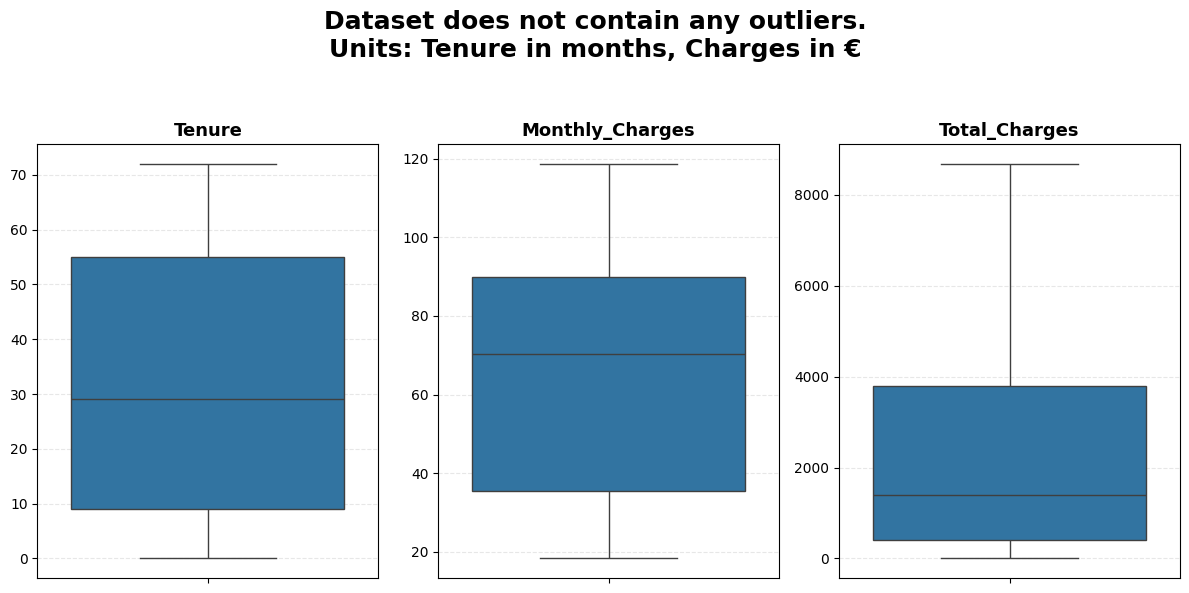

In [79]:
# Create a row of boxplots for all numeric columns
fig, axes = plt.subplots(1, len(num_cols), figsize=(12, 6))

for i, col in enumerate(num_cols):
    # Draw boxplot for each numeric feature
    sns.boxplot(y=df[col], ax=axes[i])

    # Set title and remove x/y labels for cleaner presentation
    axes[i].set_title(f'{col}', fontsize=13, fontweight='bold')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

    # Add horizontal gridlines for easier value comparison
    axes[i].grid(axis='y', linestyle='--', alpha=0.3)

# Add a main title for the figure, with context about units
fig.suptitle(
    'Dataset does not contain any outliers.\n'
    'Units: Tenure in months, Charges in €',
    fontsize=18,
    fontweight='bold'
)

# Adjust layout to prevent overlap with suptitle
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()

## 2.13. Final Checks

The dimensionality remains manageable after applying one-hot encoding.

In [80]:
print("Original Number of Columns:", 21)
print("Final Number of Columns:", df.shape[1])

Original Number of Columns: 21
Final Number of Columns: 41


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Is_Male                           7043 non-null   bool   
 1   Is_Senior                         7043 non-null   bool   
 2   Is_Married                        7043 non-null   bool   
 3   Has_Dependents                    7043 non-null   bool   
 4   Tenure                            7043 non-null   int64  
 5   Has_PhoneService                  7043 non-null   bool   
 6   Is_PaperlessBilling               7043 non-null   bool   
 7   Monthly_Charges                   7043 non-null   float64
 8   Total_Charges                     7043 non-null   float64
 9   Is_Churned                        7043 non-null   bool   
 10  Has_OnlineSecurity_No             7043 non-null   bool   
 11  Has_OnlineSecurity_NoInternet     7043 non-null   bool   
 12  Has_On

In [82]:
# Count the number of object (string) columns in the DataFrame
print("Object Columns:", df.select_dtypes(include='object').shape[1])

Object Columns: 0


# 3. Feature Engineering

Hopefully, dataset already contains a classification label feature. We create a new continuous feature to normalize total charges by applying the formula:  
$$
\text{Avg\_Monthly\_Charge} = \frac{\text{Total\_Charges}}{\text{Tenure}}
$$

This normalized feature allows for fair comparisons among short- and long-term customers as it contains tenure in it. Total charges by itslef is highely correlated to tenure.

In [83]:
# Correlation between Tenure and Total_Charges
corr = df['Tenure'].corr(df['Total_Charges'])
print(f"Correlation between Tenure and Total_Charges: {corr:.3f}")

Correlation between Tenure and Total_Charges: 0.826


In [84]:
# Create a new feature 'Avg_Monthly_Charge' by normalizing total charges over tenure
df['Avg_Monthly_Charge'] = (df['Total_Charges'] / df['Tenure']).round(2)

We encounter the same issue as with the TotalCharges column: 11 rows have Tenure = 0, which causes division by zero when calculating Avg_Monthly_Charge. These resulting NaN values should be safely replaced with 0 €.

In [85]:
# Fill NaNs with 0€
df['Avg_Monthly_Charge'] = df['Avg_Monthly_Charge'].fillna(0)

In [86]:
# Correlation between Tenure and Total_Charges
corr = df['Tenure'].corr(df['Avg_Monthly_Charge'])
print(f"Correlation between Tenure and Total_Charges: {corr:.3f}")

Correlation between Tenure and Total_Charges: 0.249


## 3.1. Average Monthly Charges: Business Justification & Impact on Machine Learning Models

The Avg_Monthly_Charge feature was created to normalize customer spending by tenure. Its low correlation with tenure (0.25) allows fair comparison between short- and long-term customers, while its moderate correlation with total charges (0.65) ensures it still captures overall customer value. This makes it more informative for churn prediction than Total_Charges alone.

For regression tasks, Avg_Monthly_Charge is preferred over Total_Charges because it accounts for tenure, reducing bias from long-term customers. It provides a per-period spending signal that is more predictive, maintains meaningful correlation with revenue, and is less confounded by customer tenure.

# 4. Feature Selection & Finalization of the DataFrames

## 4.1. Using Correlation Filtering to Decide on Dropping Monthly_Charges

In [87]:
# Correlation with Tenure
corr_tenure = df['Avg_Monthly_Charge'].corr(df['Tenure'])
print(f"Correlation with Tenure: {corr_tenure:.3f}")

# Correlation with Total_Charges
corr_total = df['Avg_Monthly_Charge'].corr(df['Total_Charges'])
print(f"Correlation with Total_Charges: {corr_total:.3f}")

# Correlation with Monthly_Charges
corr_total = df['Avg_Monthly_Charge'].corr(df['Monthly_Charges'])
print(f"Correlation with Monthly_Charges: {corr_total:.3f}")

Correlation with Tenure: 0.249
Correlation with Total_Charges: 0.651
Correlation with Monthly_Charges: 0.994


In [88]:
df = df.drop(columns='Monthly_Charges')

## 4.2. Reducing Dimensionality in One-Hot Encoding for the Machine Learning Dataset

Another way to handle multicollinearity while reducing dimensionality is to use drop_first=True in pd.get_dummies. We did not apply this directly because we maintain two versions of the dataset: one with all features, prioritizing interpretability and easier EDA, and a second with fewer, less collinear features, better suited for machine learning applications.

In [89]:
cols_to_drop = ['Has_OnlineSecurity_Yes', 'Has_OnlineBackup_Yes', 'Has_DeviceProtection_Yes', 'Has_TechSupport_Yes',
                'Has_StreamingTV_Yes', 'Has_StreamingMovies_Yes', 'Has_MultipleLines_Yes', 'Is_InternetService_DSL',
                'Is_Contract_MonthToMonth', 'Is_PaymentMethod_BankTransfer']

In [90]:
df_ml = df.drop(columns=cols_to_drop)

## 4.3. Finalize DataFrames

In [91]:
# Reorder columns
ordered_columns_ml = ['Is_Churned', 'Total_Charges', 'Avg_Monthly_Charge',  # Possible Targets
                   'Tenure',  # Numeric
                   'Is_Male',  # Binary categories
                   'Is_Senior',
                   'Is_Married',
                   'Has_Dependents',
                   'Has_PhoneService',
                   'Is_PaperlessBilling',
                   'Has_OnlineSecurity_No', 'Has_OnlineSecurity_NoInternet',  # Triple one hot encoded categories (dropped first manually)
                   'Has_OnlineBackup_No', 'Has_OnlineBackup_NoInternet',
                   'Has_DeviceProtection_No', 'Has_DeviceProtection_NoInternet',
                   'Has_TechSupport_No', 'Has_TechSupport_NoInternet',
                   'Has_StreamingTV_No', 'Has_StreamingTV_NoInternet',
                   'Has_StreamingMovies_No', 'Has_StreamingMovies_NoInternet',
                   'Has_MultipleLines_No', 'Has_MultipleLines_NoPhone',
                   'Is_InternetService_FiberOptic', 'Is_InternetService_None',
                   'Is_Contract_OneYear', 'Is_Contract_TwoYear',
                   # Fourth one hot encoded category (dropped first manually)
                   'Is_PaymentMethod_CreditCard', 'Is_PaymentMethod_ElectronicCheck', 'Is_PaymentMethod_MailedCheck'
]

# Reorder columns
ordered_columns_eda = ['Is_Churned', 'Total_Charges', 'Avg_Monthly_Charge', # Possible Targets
                   'Tenure',  # Numeric
                   'Is_Male',  # Binary categories
                   'Is_Senior',
                   'Is_Married',
                   'Has_Dependents',
                   'Has_PhoneService',
                   'Is_PaperlessBilling',
                   'Has_OnlineSecurity_Yes', 'Has_OnlineSecurity_No', 'Has_OnlineSecurity_NoInternet',  # Triple one hot encoded categories (original)
                   'Has_OnlineBackup_Yes', 'Has_OnlineBackup_No', 'Has_OnlineBackup_NoInternet',
                   'Has_DeviceProtection_Yes', 'Has_DeviceProtection_No', 'Has_DeviceProtection_NoInternet',
                   'Has_TechSupport_Yes', 'Has_TechSupport_No', 'Has_TechSupport_NoInternet',
                   'Has_StreamingTV_Yes', 'Has_StreamingTV_No', 'Has_StreamingTV_NoInternet',
                   'Has_StreamingMovies_Yes', 'Has_StreamingMovies_No', 'Has_StreamingMovies_NoInternet',
                   'Has_MultipleLines_Yes', 'Has_MultipleLines_No', 'Has_MultipleLines_NoPhone',
                   'Is_InternetService_DSL', 'Is_InternetService_FiberOptic', 'Is_InternetService_None',
                   'Is_Contract_MonthToMonth', 'Is_Contract_OneYear', 'Is_Contract_TwoYear',
                   # Fourth one hot encoded category (original)
                   'Is_PaymentMethod_BankTransfer', 'Is_PaymentMethod_CreditCard', 'Is_PaymentMethod_ElectronicCheck', 'Is_PaymentMethod_MailedCheck'
]

# Apply the reordering
df_eda = df[ordered_columns_eda]
df_ml = df[ordered_columns_ml]

In [92]:
df_eda.shape

(7043, 41)

In [93]:
df_ml.shape

(7043, 31)

In [94]:
df_ml.head();

# 5. Exploratory Data Analysis

## 5.1. Explore Binary Features

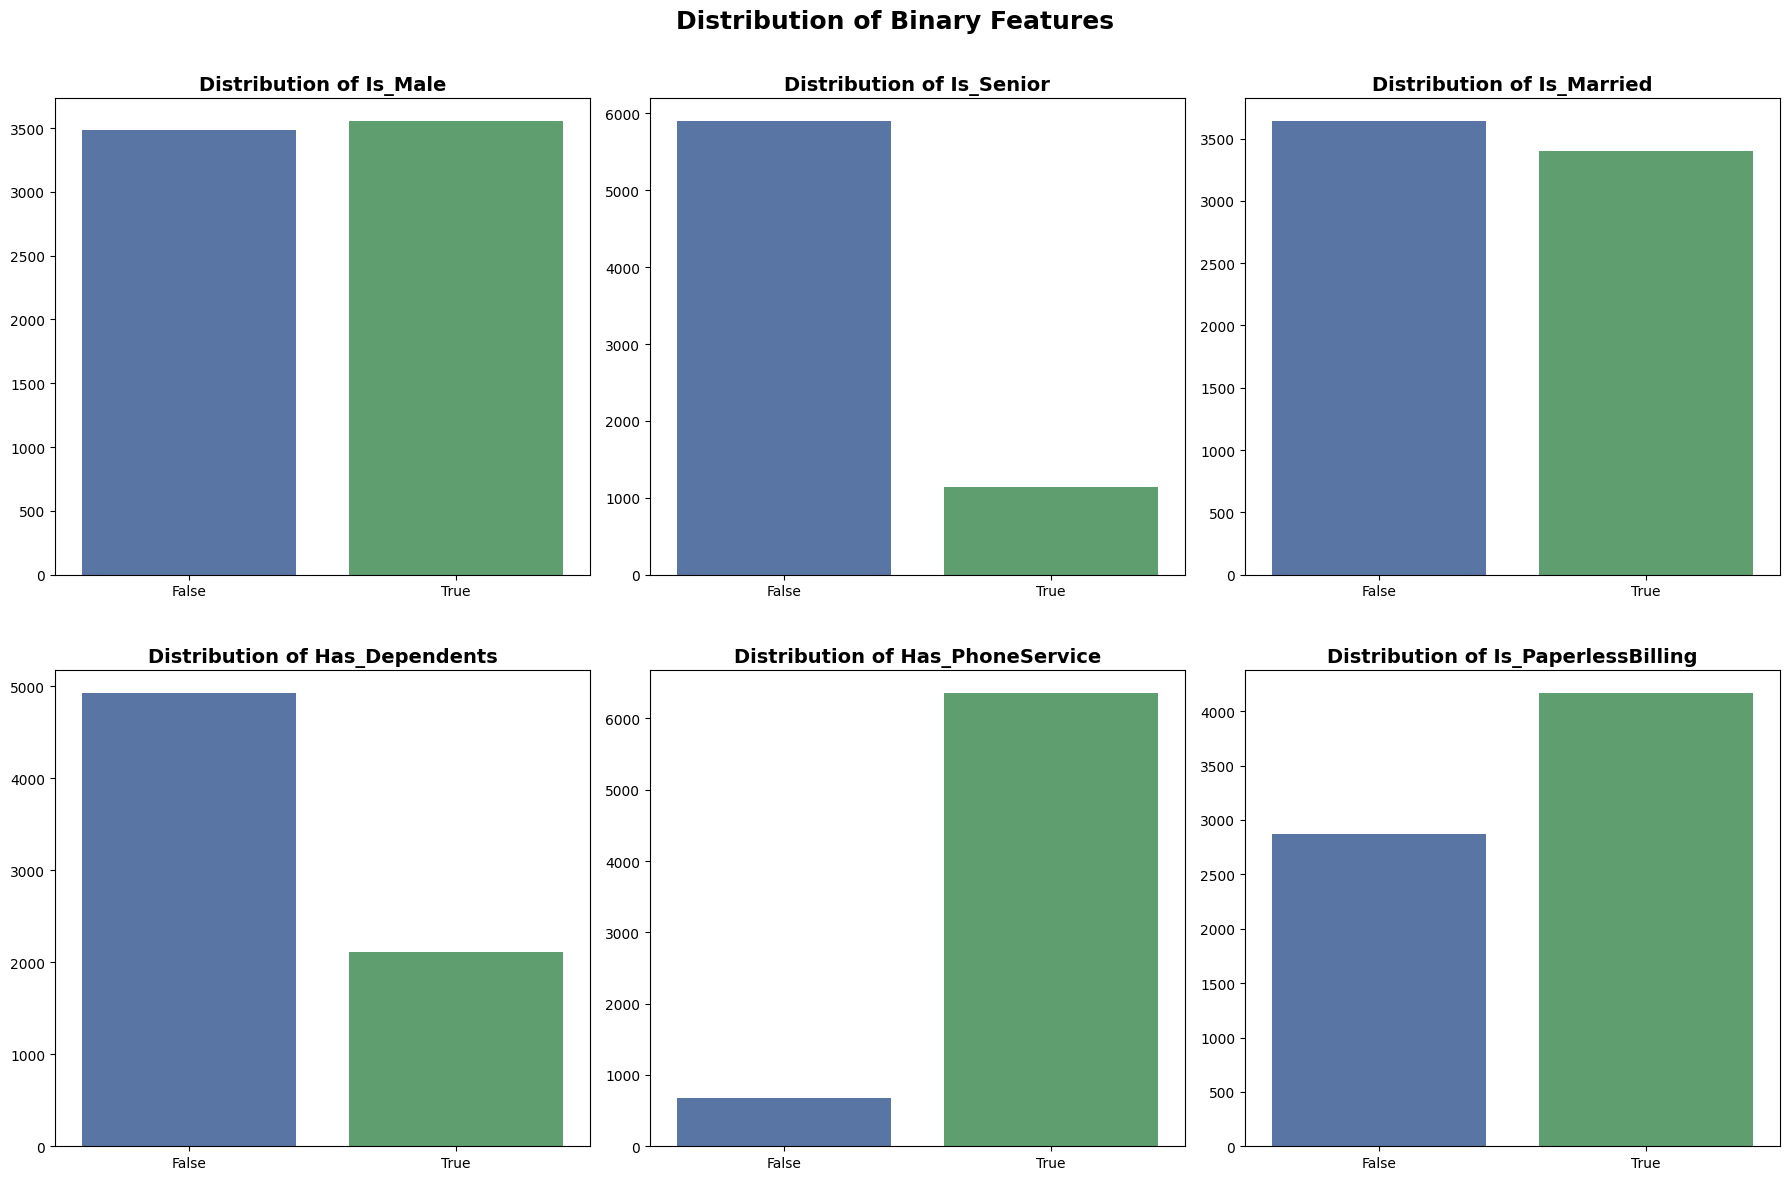

In [95]:
# List of 6 binary features to visualize
binary_features = [
    'Is_Male',
    'Is_Senior',
    'Is_Married',
    'Has_Dependents',
    'Has_PhoneService',
    'Is_PaperlessBilling'
]

# Set up a 2x3 subplot grid
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()  # Flatten to iterate easily

# Plot each binary feature
for i, feature in enumerate(binary_features):
    sns.countplot(
        x=df_eda[feature],          # Feature values on x-axis
        hue=df_eda[feature],        # Hue matches the feature for visual separation
        ax=axes[i],                 # Plot on the correct subplot
        palette={False: '#4C72B0', True: '#55A868'},  # Custom colors for False/True
        legend=False                # Remove legend as x-ticks already show values
    )

    # Title for each subplot
    axes[i].set_title(f'Distribution of {feature}', fontsize=14, fontweight='bold')

    # Remove axis labels for cleaner look
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

    # Set x-ticks as False/True instead of 0/1
    axes[i].set_xticks([0, 1])
    axes[i].set_xticklabels(['False', 'True'])

# Overall figure title
fig.suptitle('Distribution of Binary Features', fontsize=18, fontweight='bold')

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.subplots_adjust(hspace=0.2)
plt.show()

## 5.2. Explore One Hot Encoded Features

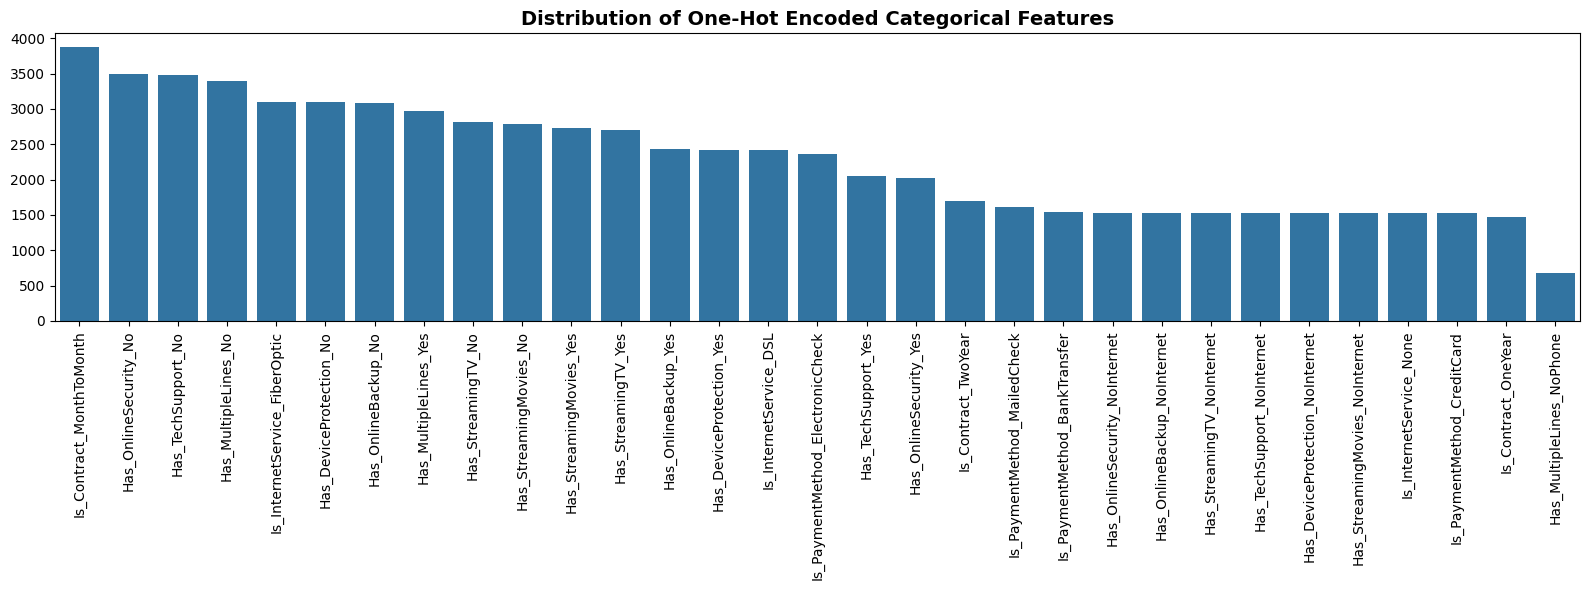

In [96]:
# Your one-hot columns
one_hot_cols = [
    'Has_OnlineSecurity_Yes', 'Has_OnlineSecurity_No', 'Has_OnlineSecurity_NoInternet',
    'Has_OnlineBackup_Yes', 'Has_OnlineBackup_No', 'Has_OnlineBackup_NoInternet',
    'Has_DeviceProtection_Yes', 'Has_DeviceProtection_No', 'Has_DeviceProtection_NoInternet',
    'Has_TechSupport_Yes', 'Has_TechSupport_No', 'Has_TechSupport_NoInternet',
    'Has_StreamingTV_Yes', 'Has_StreamingTV_No', 'Has_StreamingTV_NoInternet',
    'Has_StreamingMovies_Yes', 'Has_StreamingMovies_No', 'Has_StreamingMovies_NoInternet',
    'Has_MultipleLines_Yes', 'Has_MultipleLines_No', 'Has_MultipleLines_NoPhone',
    'Is_InternetService_DSL', 'Is_InternetService_FiberOptic', 'Is_InternetService_None',
    'Is_Contract_MonthToMonth', 'Is_Contract_OneYear', 'Is_Contract_TwoYear',
    'Is_PaymentMethod_BankTransfer', 'Is_PaymentMethod_CreditCard',
    'Is_PaymentMethod_ElectronicCheck', 'Is_PaymentMethod_MailedCheck'
]

# Count number of 1s per column
counts = df[one_hot_cols].sum().sort_values(ascending=False)

# Ensure all labels are strings
counts.index = counts.index.astype(str)

# Plot
plt.figure(figsize=(16,6))
sns.barplot(x=counts.index, y=counts.values)
plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('')
plt.title('Distribution of One-Hot Encoded Categorical Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

Sections 5.1 and 5.2 show that all categorical values in the dataset have enough rows to support effective machine learning model training. The visualizations confirm that there is no need to group rare categories or drop entire columns. In some cases, a feature with two categories may have one category represented in only a very small fraction of the data (e.g., 0.01%), making it practically useless because the model cannot learn from such rare cases. Understanding category frequencies ensures that all features are sufficiently represented and helps determine whether additional preprocessing, such as rebalancing or encoding adjustments, is required.

## 5.3. Correlation Heatmap

This analysis is useful for identifying the final regression target. The high correlation (0.83) between Total_Charges and Tenure indicates that Total_Charges is strongly influenced by how long a customer has been active. In contrast, Avg_Monthly_Charge has a much lower correlation with Tenure (0.25), making it a more unbiased measure of customer spending. Therefore, we could safely drop Total_Charges and define Avg_Monthly_Charge as the final regression target.

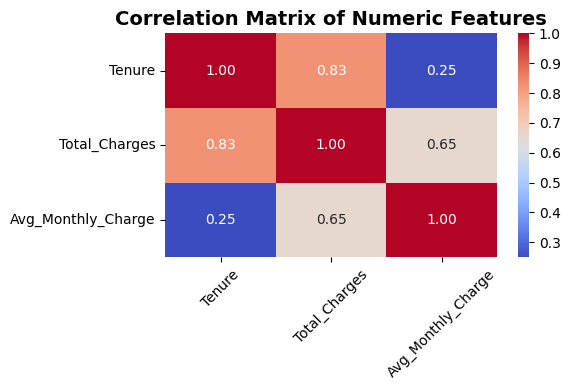

In [97]:
# Plot a correlation heatmap for numeric features
plt.figure(figsize=(6, 4))

# Compute and plot correlation matrix
sns.heatmap(
    df[['Tenure', 'Total_Charges', 'Avg_Monthly_Charge']].corr(),  # numeric features
    annot=True,         # show correlation values on the heatmap
    cmap='coolwarm',    # color map
    fmt='.2f',          # format values to 2 decimals
    cbar=True           # show colorbar
)

# Title for the heatmap
plt.title('Correlation Matrix of Numeric Features', fontsize=14, fontweight='bold')

# Rotate x-axis and y-axis labels for readability
plt.xticks(rotation=45)  # rotate x-axis labels 45 degrees
plt.yticks(rotation=0)   # keep y-axis labels horizontal

plt.tight_layout()  # adjust layout so nothing overlaps
plt.show()

## 5.4. Joint Plot for Direct Business Insight

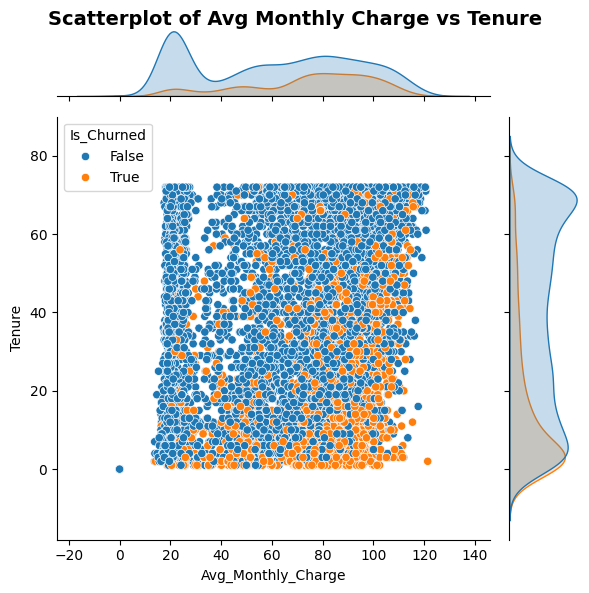

In [98]:
# Create jointplot
jp = sns.jointplot(
    x='Avg_Monthly_Charge',
    y='Tenure',
    hue='Is_Churned',
    data=df,
    height=6,   # controls figure size
)

# Set title on the figure
jp.fig.suptitle('Scatterplot of Avg Monthly Charge vs Tenure', fontsize=14, fontweight='bold')

# Adjust spacing so title doesn't overlap
jp.fig.tight_layout()
jp.fig.subplots_adjust(top=0.95)  # move title up

# 6. Save Cleane Dataset Ready for Machine Learning

In [99]:
# df_ml.to_parquet('ml_ready_dataset.parquet', index=False)